# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [2]:
url='https://ithelp.ithome.com.tw/articles/10187314'

from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# Hierarchical Clustering 演算法
hclust = cluster.AgglomerativeClustering(linkage = 'ward',
                                         affinity = 'euclidean',
                                         n_clusters = 3)

# 印出分群結果
hclust.fit(iris_X)
cluster_labels = hclust.labels_
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print(iris_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
#績效
from sklearn import metrics

# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.5543236611296415


# 使用Sklearn.cluster.AgglomerativeClustering套件

https://medium.com/ai-academy-taiwan/clustering-method-4-ed927a5b4377


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

#create datasets
X,y = datasets.make_blobs(n_samples=50,
                          centers=3,
                          n_features=2,
                          random_state= 20,
                          cluster_std = 1.5)

print(X)
print(X[:,0])
print(X[:,1])

print(y)

#parameter setting
n = 3    #number of clusters (not essential)

[[-11.44498115   1.71015151]
 [  1.95578355   4.85385147]
 [ -9.89656543   6.0062622 ]
 [ -8.31256304   4.56625608]
 [  0.57459084   6.69072266]
 [  3.44281441   9.95344187]
 [  6.92715256   8.63384209]
 [  6.99783589   6.31901239]
 [  2.24780754   7.21415824]
 [  6.58757543   6.48782095]
 [  2.51726128   8.56389626]
 [-10.72553226   3.11147527]
 [  8.62121917   3.99009844]
 [ -9.13402537   3.49267009]
 [  8.62220729   6.55050688]
 [  9.78275869   4.82454668]
 [  0.36020908   5.53478923]
 [  1.50964687   3.16972037]
 [  0.13536714   8.79381899]
 [ -9.06677434   4.96059853]
 [  8.57077044   2.26020167]
 [  3.33927904   8.5638272 ]
 [ -7.63905826   3.33483596]
 [  7.32287868   6.79820572]
 [ -9.88900932   5.55853916]
 [  8.3250346    4.61195974]
 [-10.86646179   4.66656403]
 [  9.11625531   8.53846502]
 [-10.08032716   5.52378992]
 [  0.43437629   6.29740533]
 [-10.7072353    5.12215066]
 [  2.2989208    4.4393817 ]
 [-10.56437152   3.06543398]
 [  5.60703701   5.03250322]
 [  1.59908996

In [5]:
#Agglomerative Clustering method

model = AgglomerativeClustering(n_clusters = n, linkage = 'ward')
#linkage: ['ward', 'complete', 'average']

model.fit(X)

labels = model.fit_predict(X)
labels

array([1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0,
       1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0,
       0, 2, 1, 2, 1, 0], dtype=int64)

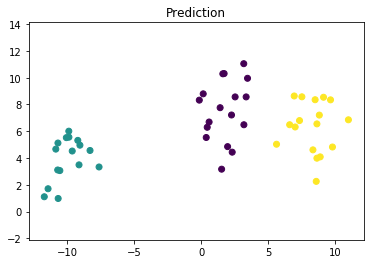

In [10]:
#results visualization
#階層式分群法利用 “ Ward’s method “ 計算

plt.figure()

plt.scatter(X[:,0], X[:,1], c = labels)

plt.axis('equal')
plt.title('Prediction')

plt.show()

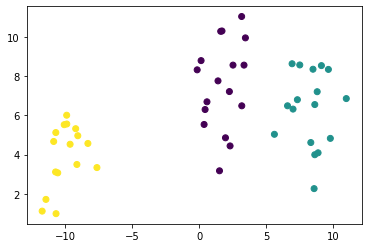

In [12]:
#原始資料集
plt.scatter(X[:,0], X[:,1], c = y)

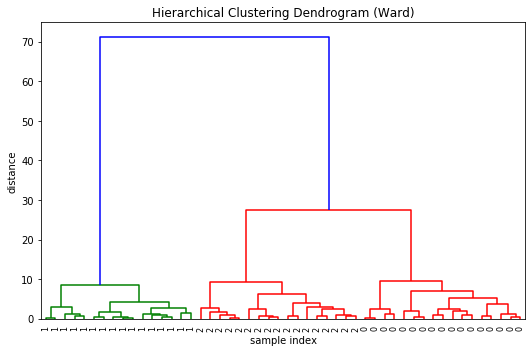

In [15]:
#利用樹狀圖來看分群的策略為何

from scipy.cluster.hierarchy import dendrogram, linkage

# Performs hierarchical/agglomerative clustering on X by using "Ward's method"
linkage_matrix = linkage(X, 'ward')

figure = plt.figure(figsize=(7.5, 5))

# Plots the dendrogram
dendrogram(linkage_matrix, labels = labels)

plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()